In [54]:
import glob
import os
import numpy as np
import pandas as pd
import zipfile
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [61]:
#reads nov 2025 (for playing around)
path = "C:\\Users\\linathan\\Documents\\bts_downloads_2020_2025"
all_files = [path+"\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2025_11"]
name = "On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2025_11"

In [62]:
#reads nov 2025 (for playing around)
print(all_files[0])
zf = zipfile.ZipFile(all_files[0]+'.zip')
print(zf.namelist())
df = pd.read_csv(zf.open(name+'.csv'))

C:\Users\linathan\Documents\bts_downloads_2020_2025\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2025_11
['On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2025_11.csv', 'readme.html']


C:\Users\linathan\AppData\Local\Temp\1\ipykernel_17988\1266652887.py:5: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zf.open(name+'.csv'))


In [64]:
#removes rows with diverted flights
df = df[df['Diverted']== 0]

In [65]:
#creates new column which is the sum of non-weather delay times
df['NotWeatherDelay'] = df['CarrierDelay'] + df['NASDelay'] + df['LateAircraftDelay'] + df['SecurityDelay']

In [76]:
#removes columns with categories we don't care about
df = df[['Year', 'Month', 'DayofMonth',
    'DayOfWeek','CRSDepTime','DepTime',
    'DepDelay','DepDelayMinutes','DepDel15','CRSArrTime','ArrTime','ArrDelay','ArrDelayMinutes','ArrDel15',
    'Cancelled','AirTime', 'WeatherDelay', 'NotWeatherDelay', 'Dest', 'Origin', 'Reporting_Airline', 'Tail_Number', 'TaxiIn', 'TaxiOut']]

In [86]:
#creates new column CancelOrDelayed
df['CancelOrDelayed'] = ((df['Cancelled'] == 1) | (df['DepDelay'] > 0) | (df['ArrDelay'] > 0))

C:\Users\linathan\AppData\Local\Temp\1\ipykernel_17988\737725423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CancelOrDelayed'] = ((df['Cancelled'] == 1) | (df['DepDelay'] > 0) | (df['ArrDelay'] > 0))


In [88]:
delayNans = {'WeatherDelay' : 0, 'NotWeatherDelay' : 0}
df=df.fillna(value = delayNans)

In [104]:
df['Reporting_Airline'].unique()

array(['OO', 'UA', 'DL', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH', 'AA', 'AS',
       'B6', 'WN', 'YX'], dtype=object)

In [93]:
df.to_csv("C:\\Users\\linathan\\Documents\\cleaned_files_test_folder\\cleaned_test_2020_12.csv")

In [90]:
df2 = df[df['Cancelled']==0]

In [72]:
import missingno as msno
import matplotlib.pyplot as plt

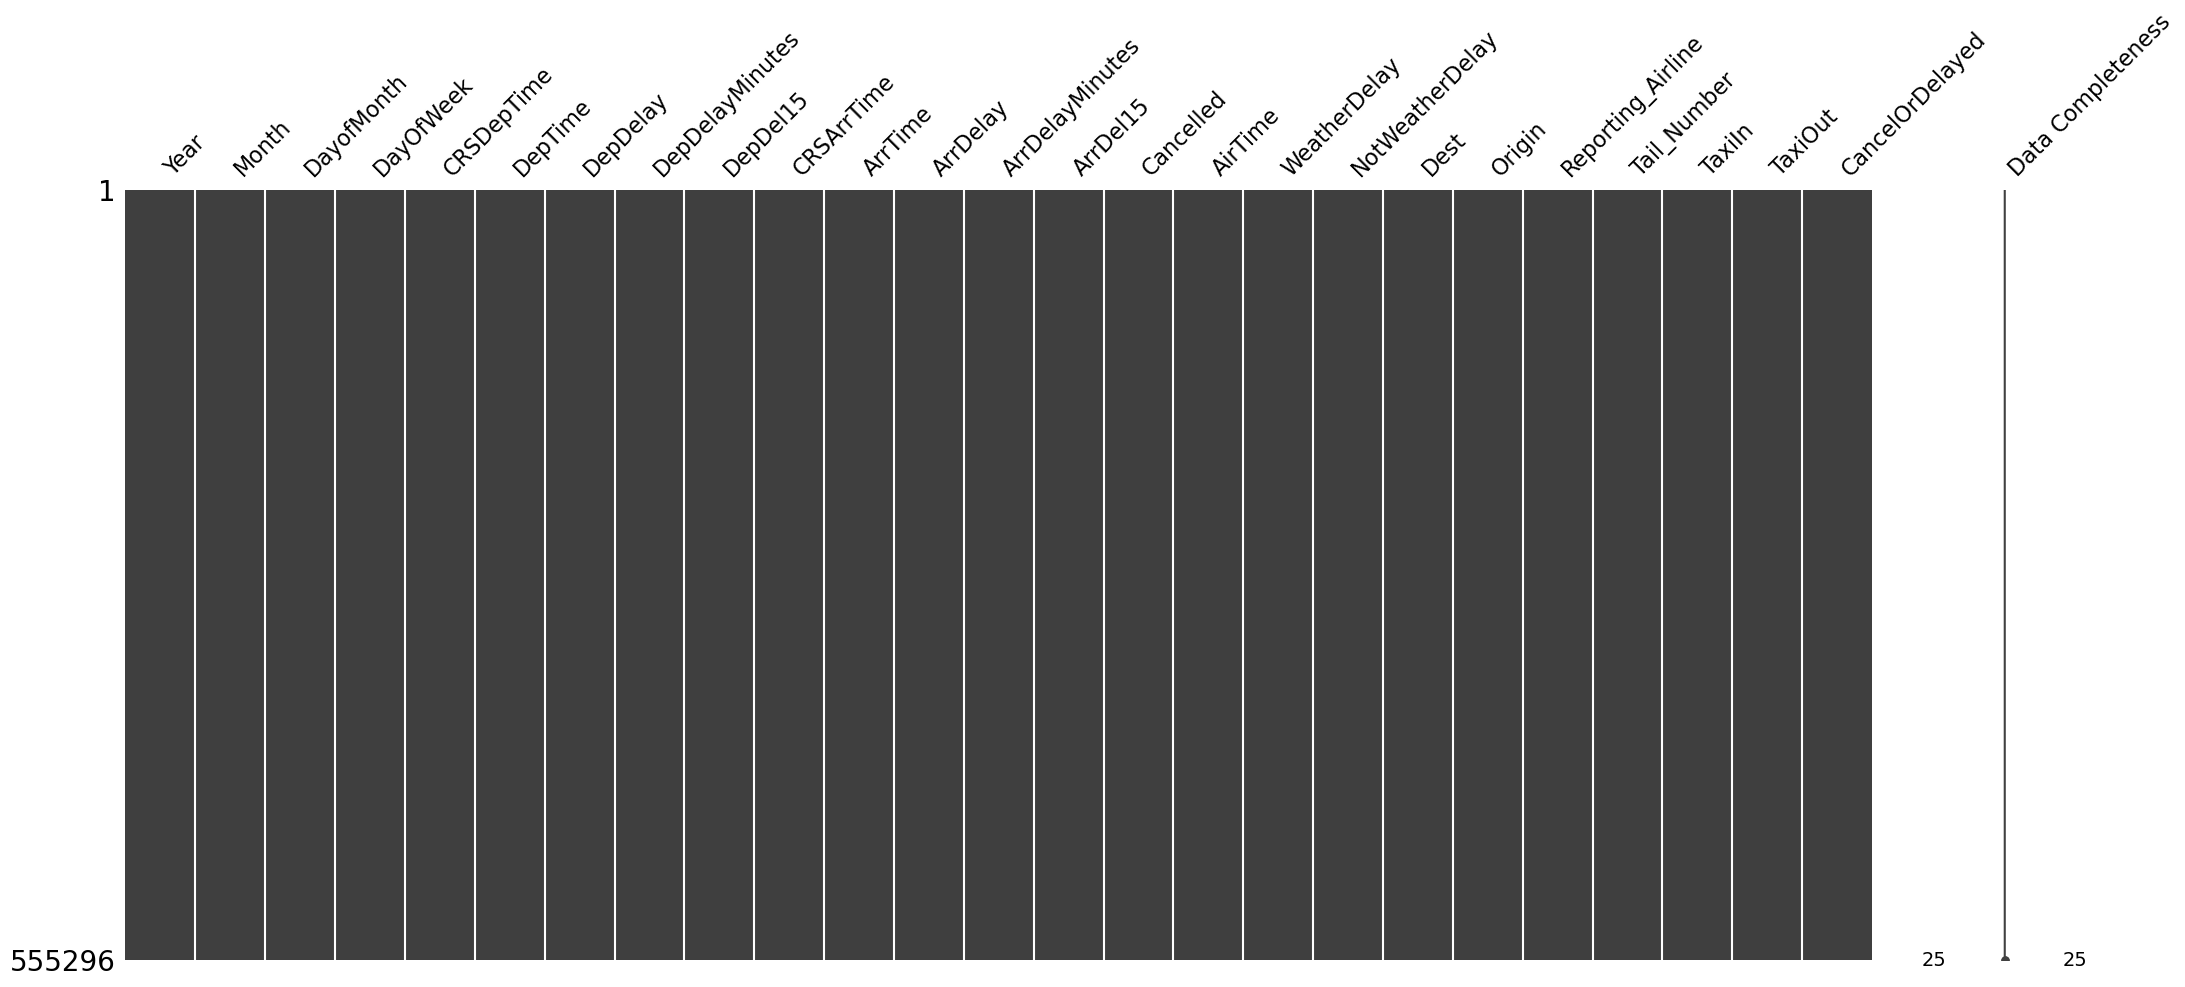

In [91]:
msno.matrix(df2, labels=True)
plt.show()

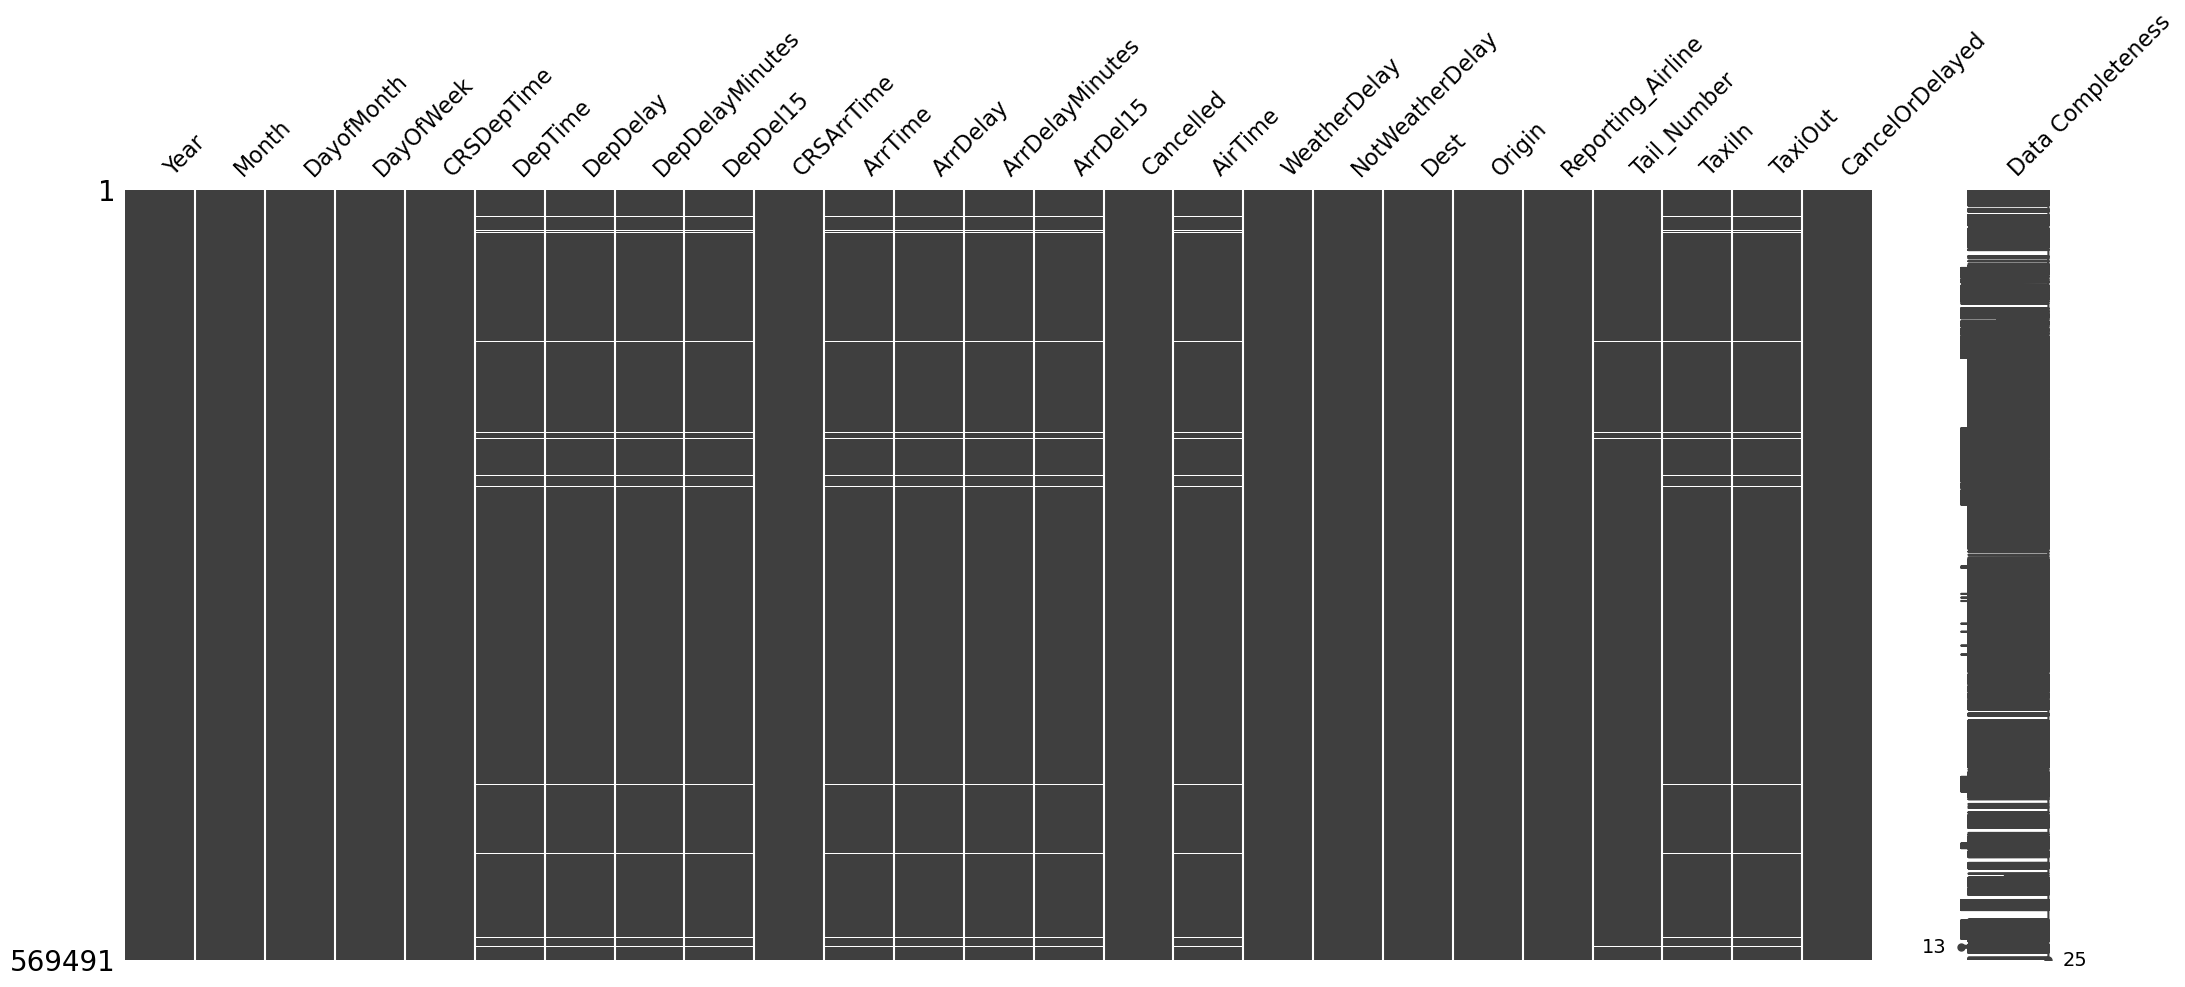

In [89]:
msno.matrix(df, labels = True)
plt.show()

In [112]:
def cleandata(df):
    #removes rows with diverted flights
    df = df[df['Diverted']== 0]
    
    #creates new column which is the sum of non-weather delay times
    df['NotWeatherDelay'] = df['CarrierDelay'] + df['NASDelay'] + df['LateAircraftDelay'] + df['SecurityDelay']
    
    #removes columns with categories we don't care about
    df = df[['Year', 'Month', 'DayofMonth',
    'DayOfWeek','CRSDepTime','DepTime',
    'DepDelay','DepDelayMinutes','DepDel15','CRSArrTime','ArrTime','ArrDelay','ArrDelayMinutes','ArrDel15',
    'Cancelled','AirTime', 'WeatherDelay', 'NotWeatherDelay', 'Dest', 'Origin', 'Reporting_Airline', 'Tail_Number', 'TaxiIn', 'TaxiOut']]
    
    #creates new column CancelOrDelayed
    df['CancelOrDelayed'] = ((df['Cancelled'] == 1) | (df['DepDelay'] > 0) | (df['ArrDelay'] > 0))
    
    #fills all the NaN values in Delay/NotWeatherDelay with zeroes
    delayNans = {'WeatherDelay' : 0, 'NotWeatherDelay' : 0}
    df=df.fillna(value = delayNans)

    #removes all rows whose reporting airline is not an airline present in nov 2025
    airlines = ['OO', 'UA', 'DL', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH', 'AA', 'AS',
       'B6', 'WN', 'YX']
    df = df[df['Reporting_Airline'].isin(airlines)]
    
    return df

In [113]:
#saves cleaned up dataframes from dec 2020 to nov 2025 as csv files 
for year in range(2020, 2025):
    startMonth = 12 if year == 2020 else 1
    endMonth = 11 if year == 2025 else 12
    for month in range(startMonth, endMonth+1):
        zf = zipfile.ZipFile(path + f'\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_{year}_{month}' + '.zip')
        currentdf = pd.read_csv(zf.open(f"On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_{year}_{month}" + '.csv'))
        cleandata(currentdf).to_csv(path_or_buf =f"C:\\Users\\linathan\\Documents\\cleaned_files_dec2020_nov2025\\cleaned_{year}_{month}" +'.csv' )
        #clears up memory for next loop iteration
        del currentdf

C:\Users\linathan\AppData\Local\Temp\1\ipykernel_17988\3025021399.py:7: DtypeWarning: Columns (76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  currentdf = pd.read_csv(zf.open(f"On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_{year}_{month}" + '.csv'))
C:\Users\linathan\AppData\Local\Temp\1\ipykernel_17988\842363296.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NotWeatherDelay'] = df['CarrierDelay'] + df['NASDelay'] + df['LateAircraftDelay'] + df['SecurityDelay']
C:\Users\linathan\AppData\Local\Temp\1\ipykernel_17988\3025021399.py:7: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  currentdf = pd.read_csv(zf.open(f"On_Time_Reportin

In [52]:
#creates a dictionary where every (year, month) corresponds to the csv file name for that year and month
fileBook = {}
for year in range(2010, 2024):
    maxMonth = 12 if year == 2023 else 13 
    for month in range(1, maxMonth):
        csvName = f"On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_{year}_{month}"
        fileBook[(year, month)] = csvName

In [27]:
#keeps passthrough columns, drops any columns not mentioned
#one hot encoder for Reporting_Airline, Origin, Dest
ct = ColumnTransformer([
    ('pass', 'passthrough', ['Year', 'Month', 'DayofMonth',
    'DayofWeek','CRSDepTime','DepTime',
    'DepDelay','DepDelayMax','DepDel15','CRSArrTime','ArrTime','ArrDelay','ArrDelayMax','ArrDel15',
    'Cancelled','AirTime', 'WeatherDelay', 'NotWeatherDelay']),
    ('1hotID', OneHotEncoder(), ['Dest', 'Origin', 'Reporting_Airline'])
])

In [53]:
#creates a dictionary where every (year, month) corresponds to the DataFrame for that year and month
#currently runs into memory issues even on Joao's office desktop
dataBook = {}
for year in range(2010,2024):
    maxMonth = 12 if year == 2023 else 13
    for month in range(1, maxMonth):
        zf = zipfile.ZipFile(path + f'\\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_{year}_{month}' + '.zip')
        dataBook[(year, month)] = pd.read_csv(zf.open(fileBook[(year, month)] + '.csv'))

C:\Users\linathan\AppData\Local\Temp\1\ipykernel_17988\2943428216.py:6: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  dataBook[(year, month)] = pd.read_csv(zf.open(fileBook[(year, month)] + '.csv'))
C:\Users\linathan\AppData\Local\Temp\1\ipykernel_17988\2943428216.py:6: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  dataBook[(year, month)] = pd.read_csv(zf.open(fileBook[(year, month)] + '.csv'))
C:\Users\linathan\AppData\Local\Temp\1\ipykernel_17988\2943428216.py:6: DtypeWarning: Columns (69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  dataBook[(year, month)] = pd.read_csv(zf.open(fileBook[(year, month)] + '.csv'))
C:\Users\linathan\AppData\Local\Temp\1\ipykernel_17988\2943428216.py:6: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  dataBook[(year, month)] = pd.read_csv(z

MemoryError: Unable to allocate 282. MiB for an array with shape (70, 528588) and data type float64